This notebook presents a simple use of the routines designed to read and plot the main Diva input and output information.<br> Input and output files corresponding to a Diva application in the Black Sea (see [Capet et al. 2014](http://link.springer.com/article/10.1007%2Fs10236-013-0683-4) for details) are provided so the user can test the different modules and functions.

All the functions to read the input files are in the module **diva2Dread**, while the plotting functions are in the module **diva2Dplot**.

In [25]:
import os
import diva2Dread
import diva2Dplot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
import importlib
importlib.reload(diva2Dplot)

<module 'diva2Dplot' from '/home/ctroupin/ULg/DIVA/Diva_python_tools/diva2Dplot.py'>

# Input information

We assume that all the input files are located inside the following directory:

In [43]:
inputdir = './input/'
datafile = os.path.join(inputdir, 'MLD1.dat')
contourfile = os.path.join(inputdir, 'coast.cont')
paramfile = os.path.join(inputdir, 'param.par')

## Data

First we load the coordinates and the value.

In [44]:
lon, lat, field = diva2Dread.read_data(datafile)

Then we represent the data positions.

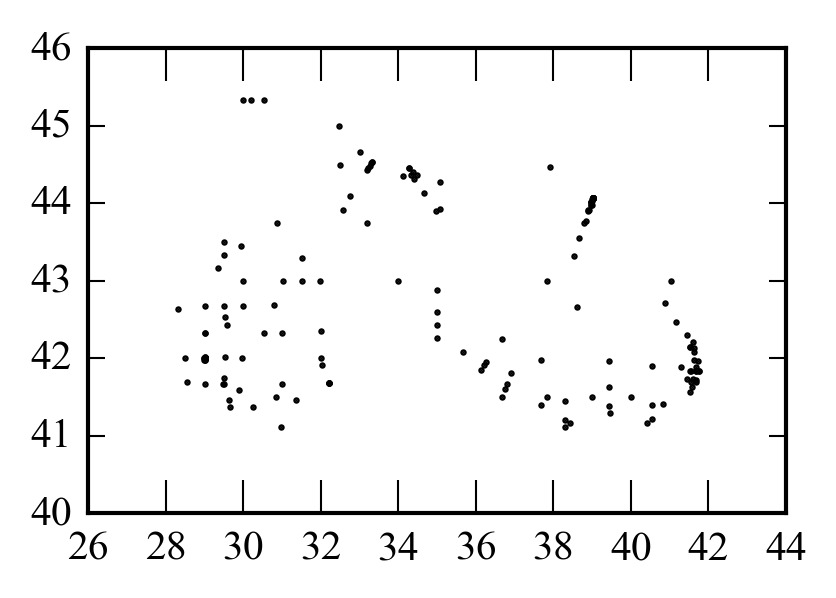

In [45]:
fig = plt.figure(figsize=(3, 2))
diva2Dplot.plot_datapoints(lon, lat, s=.3, color='k')
plt.show()

We can also represent the field value with a scatter plot.

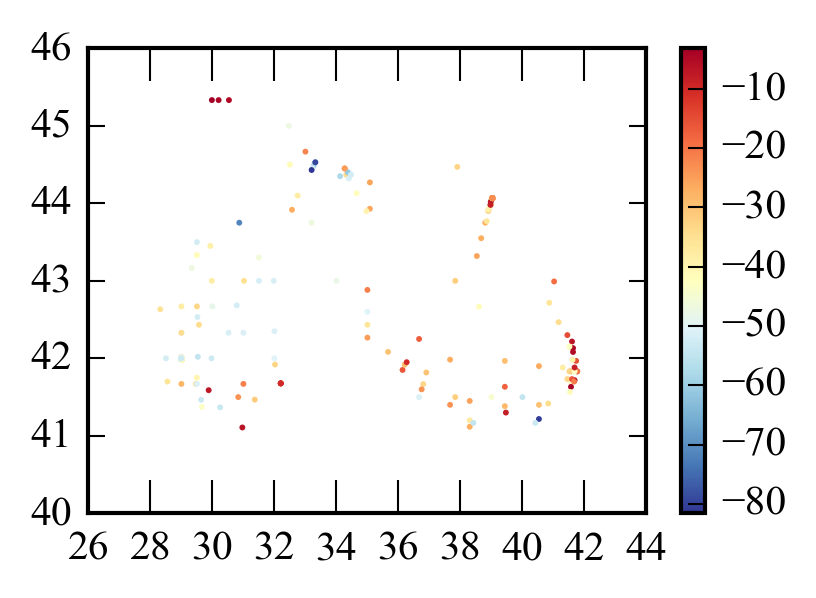

In [46]:
fig = plt.figure(figsize=(3, 2))
diva2Dplot.plot_datapoints(lon, lat, field, s=2, edgecolor='None')
plt.show()
plt.close()

## Contours

The contour is loaded using the corresponding function.

In [34]:
contours = diva2Dread.read_contour(contourfile)

The plot is done in a similar fashion.<br>
By default, each contour is represented in a different color.

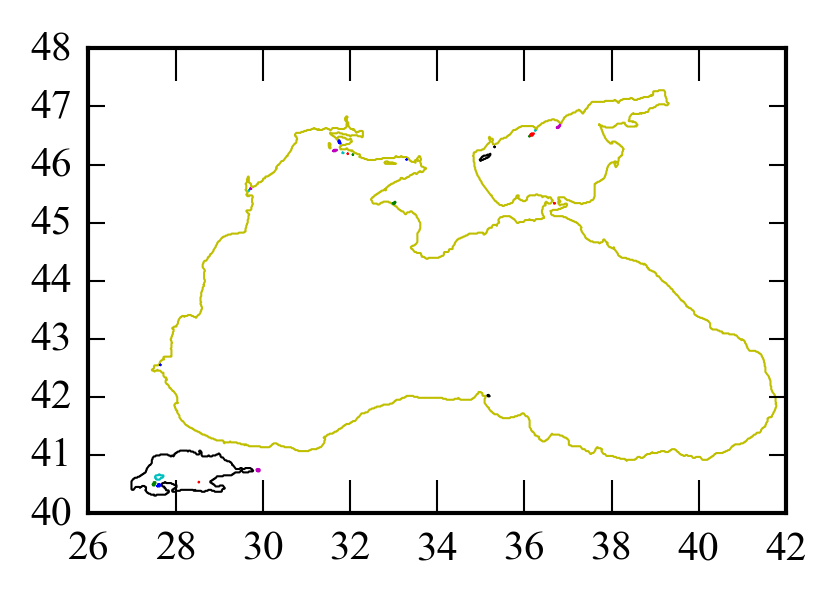

In [35]:
fig = plt.figure(figsize=(3, 2))
diva2Dplot.plot_contour(contours, linewidth=0.2)
plt.show()
plt.close()

## Parameters

In [36]:
lc, icoord, ispec, ireg, xori, yori, dx, dy, nx, ny, valex, snr, varbak = \
diva2Dread.read_parameters(paramfile)

In [13]:
print("Correlation length: {0}".format(lc))
print("Signal-to-noise ratio: {0}".format(snr))

Correlation length: 1.0
Signal-to-noise ratio: 1.0


We can also display the output grid (in this example the grid is not too fine to allow a display).

In [ ]:
diva2Dplot.plot_outputgrid(xori, yori, dx, dy, nx, ny)

# Output information

We assume that all the output files are located inside the following directory:

In [47]:
outputdir = './output/'
meshfile = os.path.join(outputdir, 'mesh.dat')
meshtopofile = os.path.join(outputdir, 'meshtopo.dat')
resultfile = os.path.join(outputdir, 'MLD01.nc')

## Mesh

We have to read the information from 2 files: one containg the mesh topology, the other the mesh coordinates themselves.

In [4]:
xnode, ynode, i1, i2, i3 = diva2Dread.read_mesh(meshfile, meshtopofile)

With that information, the mesh can be displayed.<br>
Note that the mesh plotting function requires that "ax" exists for the current figure, hence the 2nd line of the next code cell. 

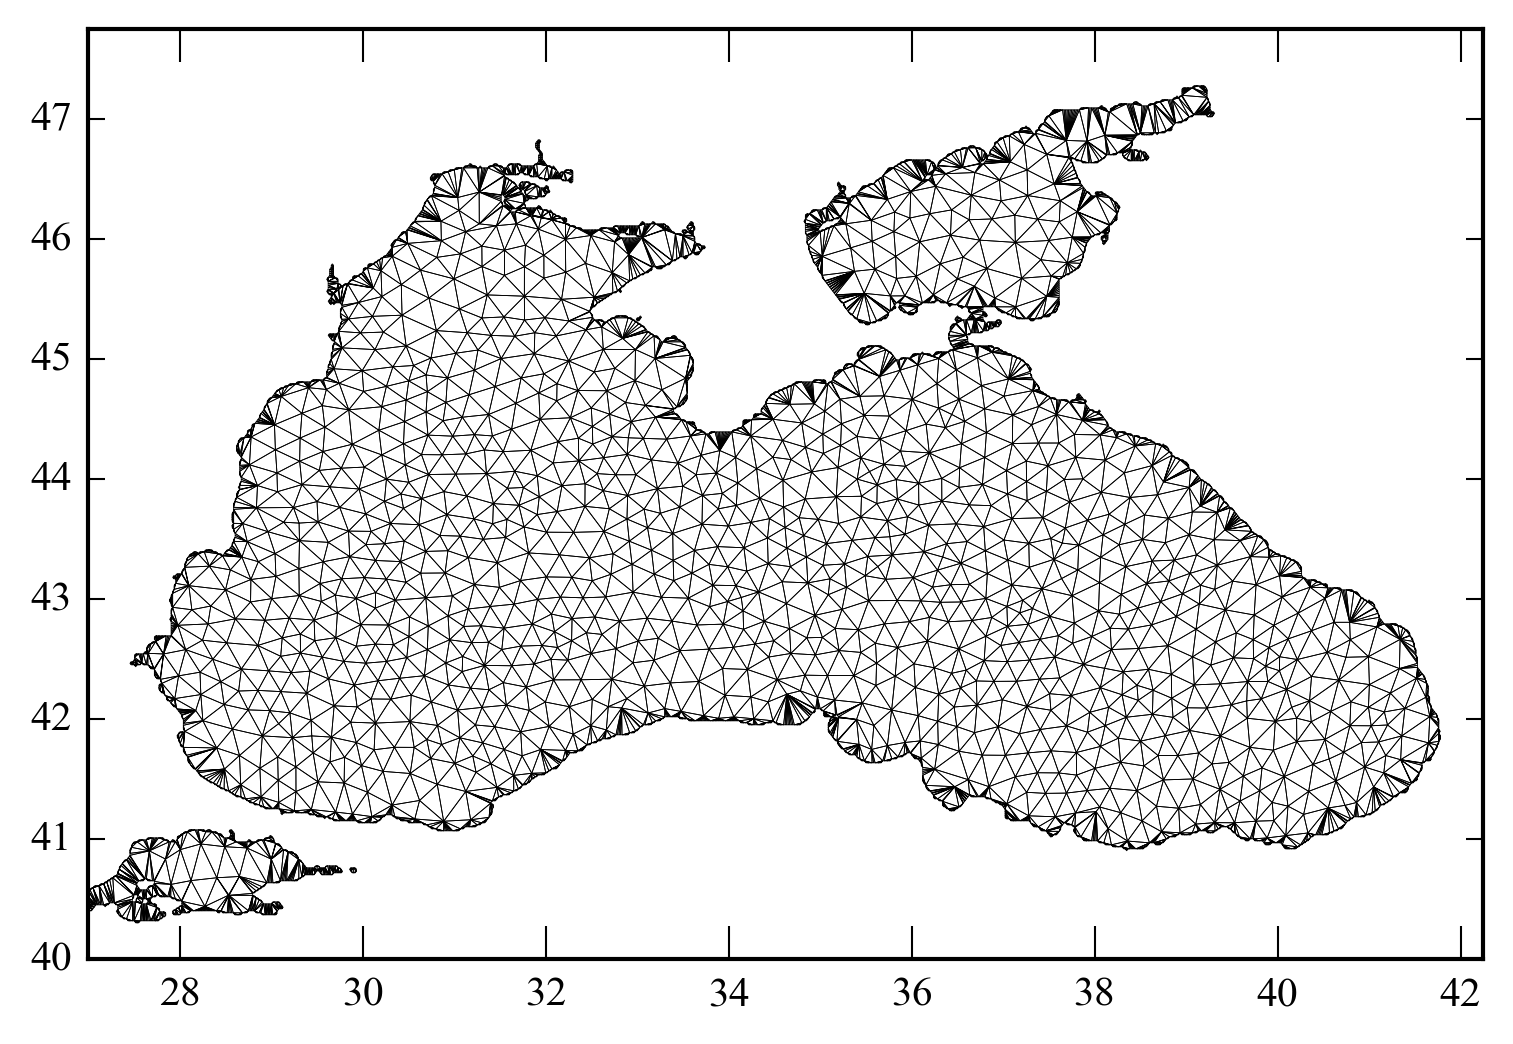

In [14]:
f, ax = plt.subplots()
diva2Dplot.plot_mesh(xnode, ynode, i1, i2, i3, ax)
ax.set_xlim(xori, xori + nx * dx)
ax.set_ylim(yori, yori + ny * dy)
plt.show()
plt.close()

## Analyzed field

Let's load the data from the netCDF file. As we know the exclusion value from the parameter file, we can mask the land points prior to the figure. 

In [48]:
x, y, analyzedfield, errorfield = diva2Dread.read_results(resultfile)
analyzedfield = np.ma.masked_where(analyzedfield==valex, analyzedfield)

Now we plot the results.

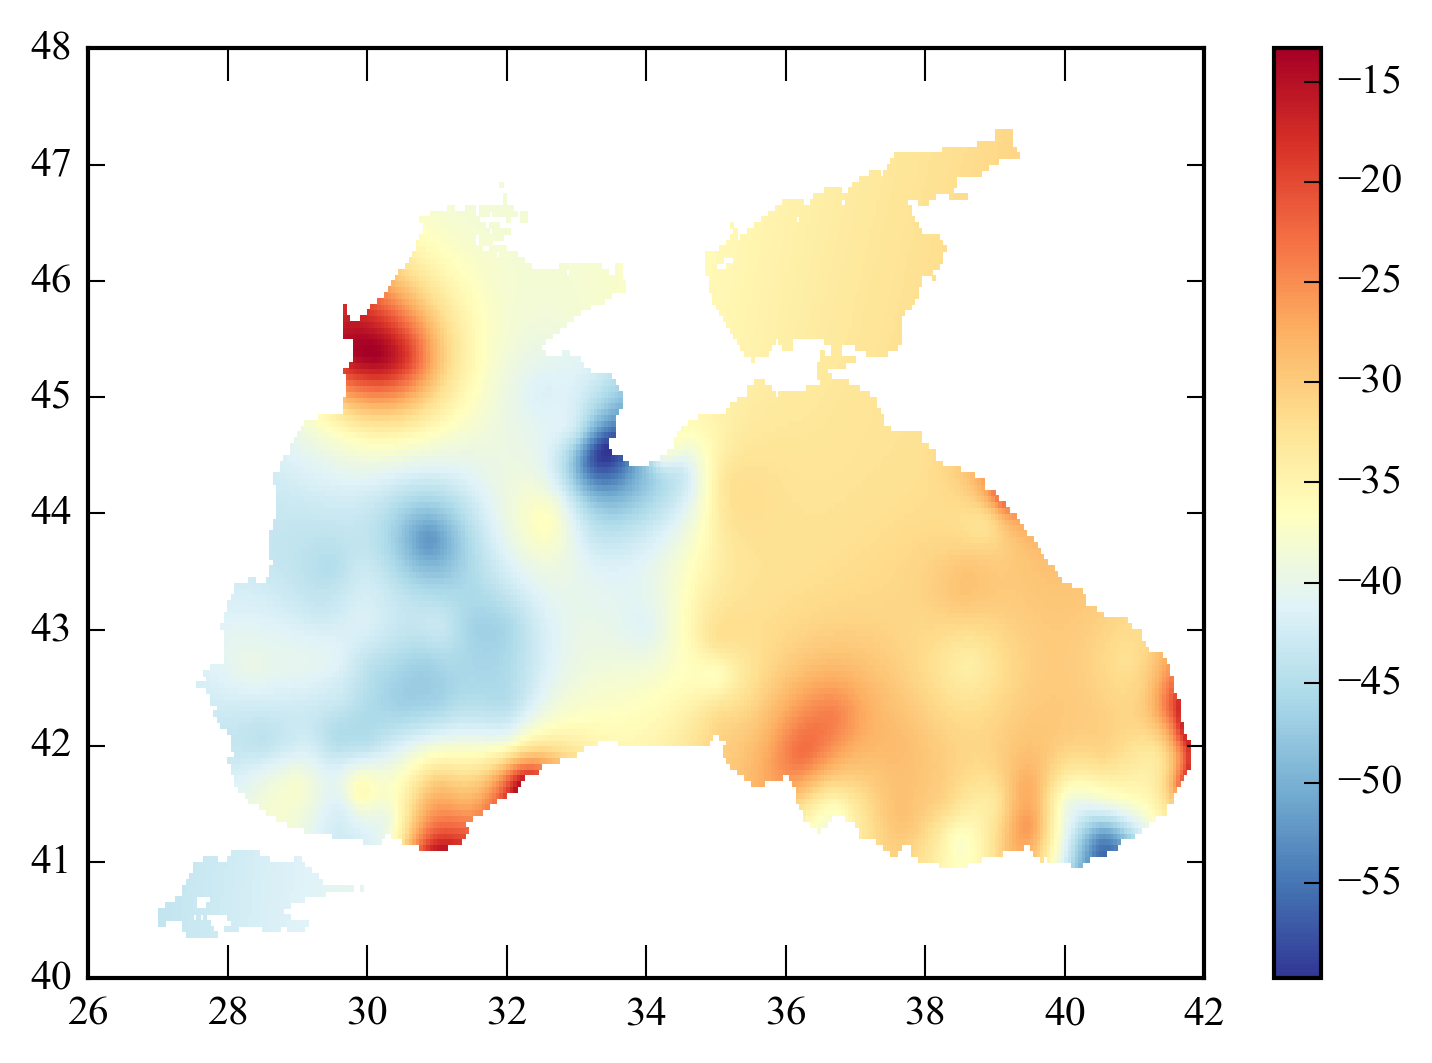

In [49]:
diva2Dplot.plot_field(x, y, analyzedfield)

# Input and output

Combining different layers of information is straighforward.<br>
Here we will show almost everything: contour, data, mesh and analysis.

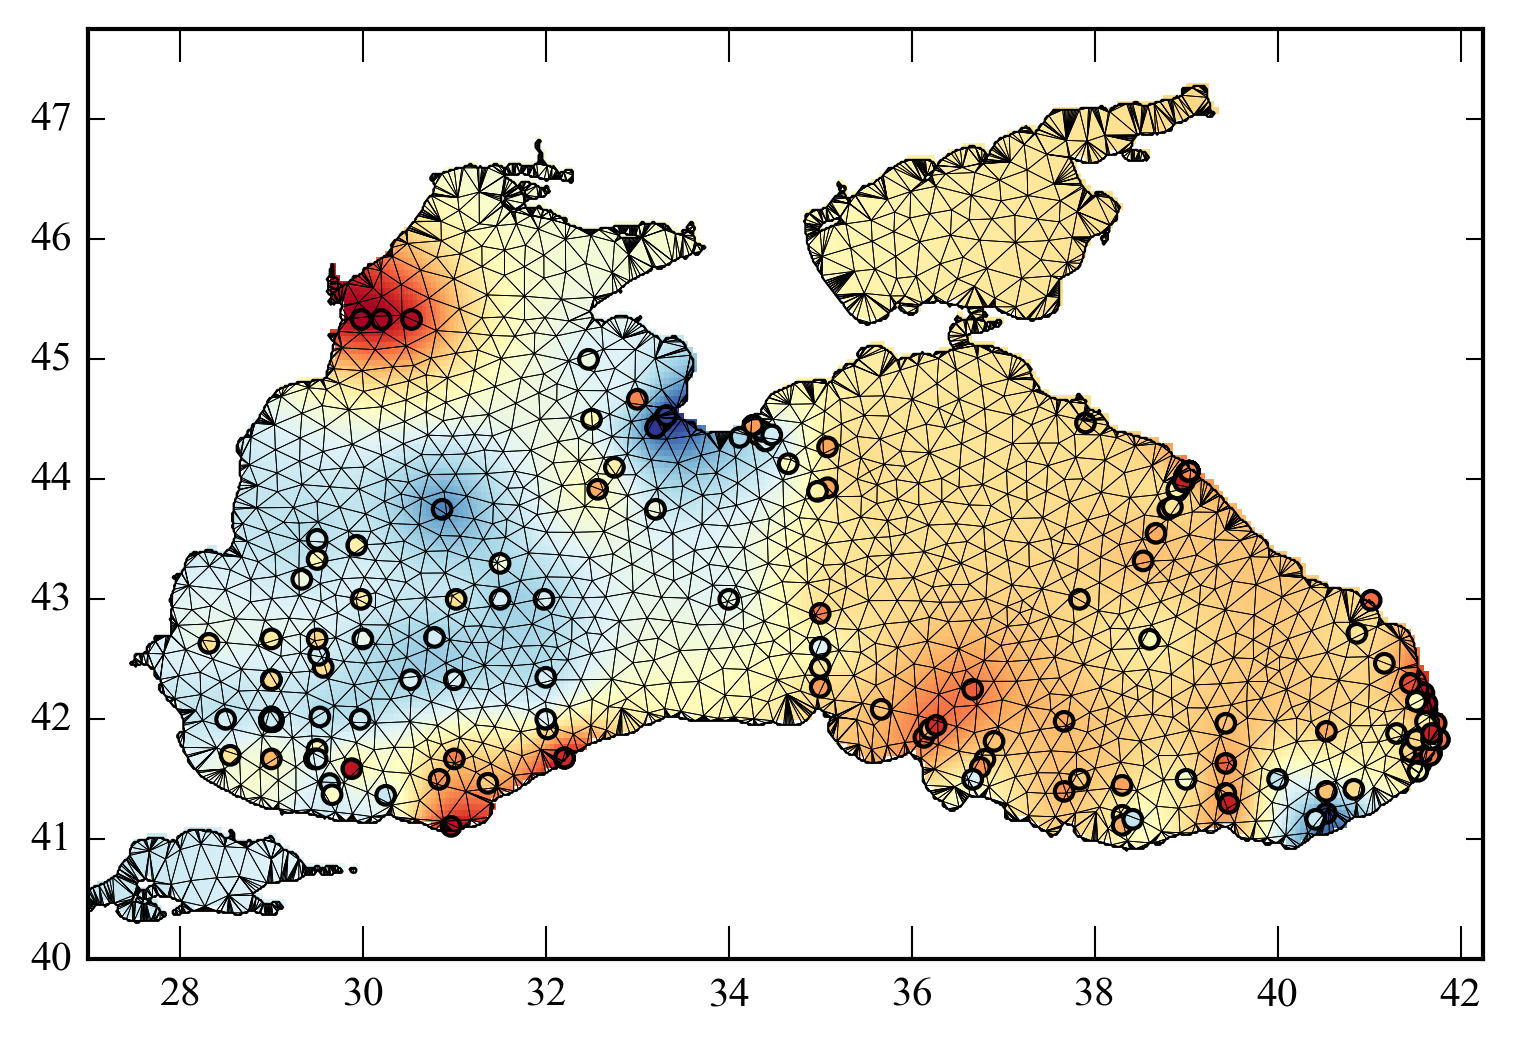

In [59]:
f, ax = plt.subplots()
diva2Dplot.plot_field(x, y, analyzedfield)
diva2Dplot.plot_mesh(xnode, ynode, i1, i2, i3, ax)
diva2Dplot.plot_datapoints(lon, lat, field)
diva2Dplot.plot_contour(contours, linecolor='k')
ax.set_xlim(xori, xori + nx * dx)
ax.set_ylim(yori, yori + ny * dy)
plt.savefig('./testfigures/BlackSeaMLD.png', dpi=300)
plt.show()
plt.close()